#**LAB 8 Quadratic Equation - Classic - Po Shen Loh**

Javier Alejandro Ortiz Silva

***

**Contenido**
1. Notebook sin editar
2. Solucion del Lab

***

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


Text(0, 0.5, 'f(x)')

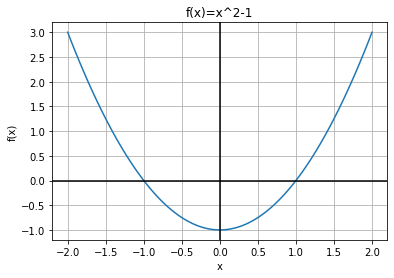

In [2]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')




zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


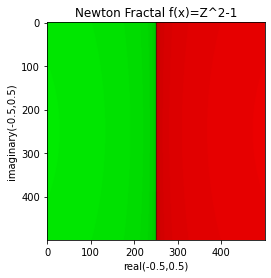

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


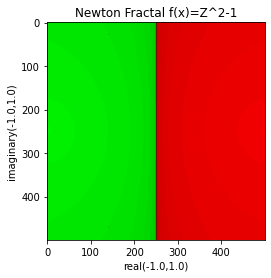

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


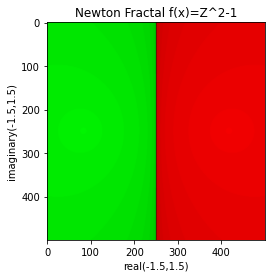

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


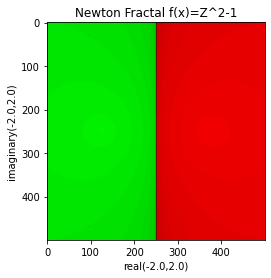

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


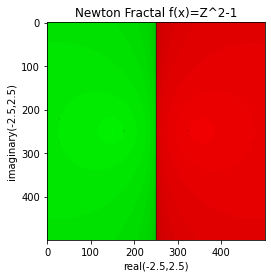

In [3]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


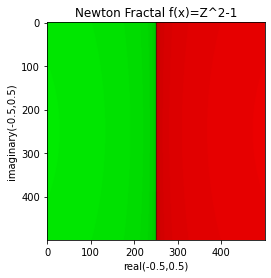

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


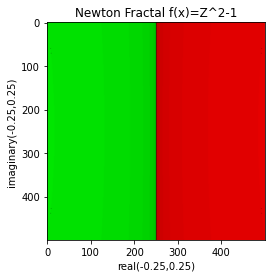

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


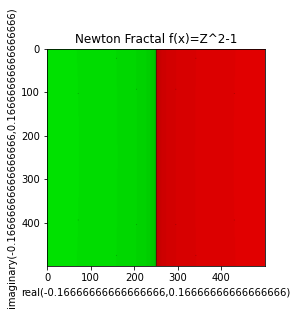

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


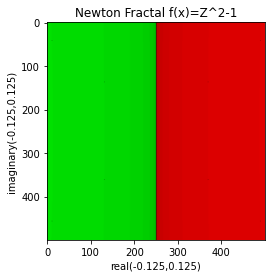

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


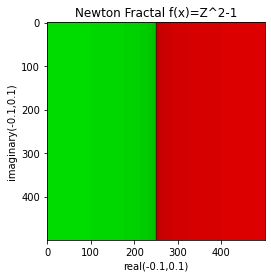

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


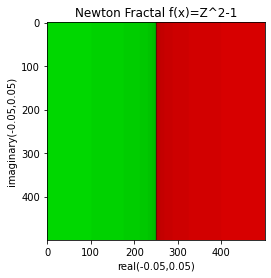

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


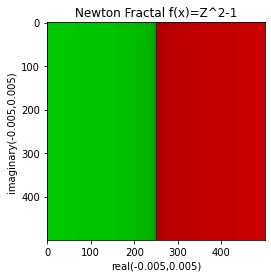

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


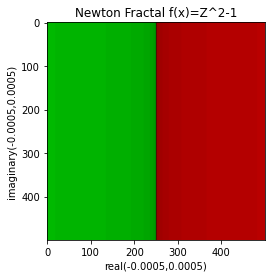

In [4]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## Newton iterates form z=10.0 + 0.0j

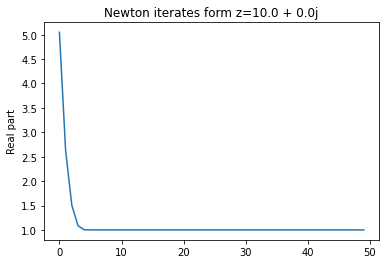

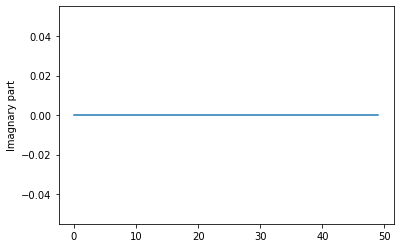

In [5]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

## Newton iterates form z=-10.0 + 0.0j

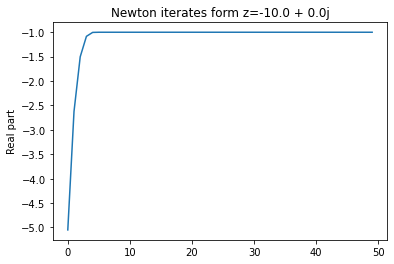

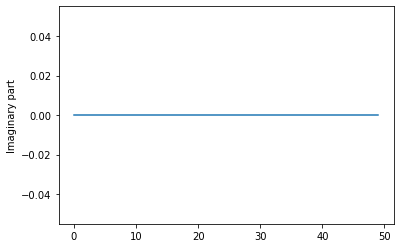

In [6]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 10.0j

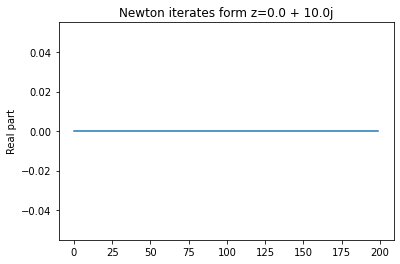

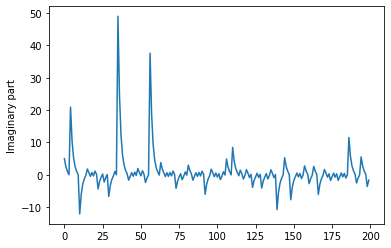

In [7]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 - 10.0j

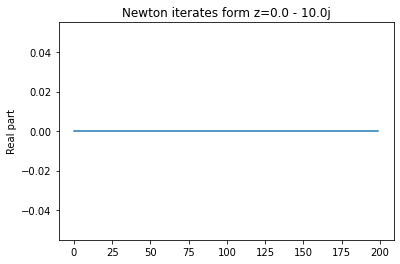

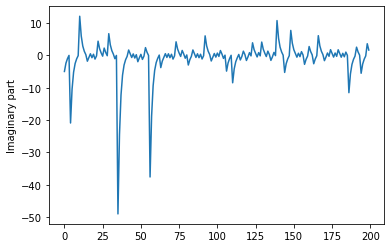

In [8]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

## Newton iterates form z=0.0 + 0.0j

In [10]:
import numpy

z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# **Solucion Laboratorio 6: Quadratic Equation – Classic – Po Shen Loh**

#Ecuacion cuadratica clasica

In [11]:
import sympy

def Cuadratica_clasica(a,b,c):
  sulucion_usando_menos =  (-b - sympy.sqrt(b**2 - 4*a*c))/(2*a)
  sulucion_usando_mas =  (-b + sympy.sqrt(b**2 - 4*a*c))/(2*a)
  return sulucion_usando_menos, sulucion_usando_mas

In [12]:
#X^2 -8X +12 = (x-2)(x-6)
print(Cuadratica_clasica(1,-8,12))

(2, 6)


#Ecuacion cuadratica de Po-Shen-Loh

**Version paso a paso**

In [13]:
def ajustarAX(a,b,c):
  k = 1/a
  return a*k,b*k,c*k

def Cuadratica_Po_explicado(a,b,c):

  if(a==1):
      
    x2 = str(a) + "X^2"

    if(b<0):
      x1 = " - "+ str(-b) +"X"
    else:
      x1= " + " + str(b) +"X"

    if(c<0):
      x0 = " - "+ str(-c)
    else:
      x0= " + " + str(c)

    ecuacion =  x2 + x1 +x0
    

    print("__________________________________________________________________")
    print("BASE  DEL  ALGORITMO\n\n")
    print("es posible factorizar una ecuacion cuadratica como el producto de dos monomios")
    print("x^2  +  bx  +  c  =  (x-R)  (x-s)\n\n")

    print("con esta factorizacion la funcion se hace 0 si x=R o x=s")
    print("de alli se deduce que R y S son raices\n\n")
    print("expandiendo el producto anterior llegamos a")
    print("x^2  +  bx  +  c  =  x^2  - (R+S)x  + RS\n\n")
    print("en donde se pude igualar el segundo termino asi")
    print(" bx = -(R+S)x  " )
    print("  b = -(R+S) " )
    print(" -b =  (R+S) \n\n\n" )
    print("De lo anterior se concluye que las dos soluciones de una ecuacion cuadratica")
    print("de la forma  x^2  +  bx  +  c  cumplen -b =  (R+S)  y RS = c ")
    print("\n\nEl algoritmo de Po parte de usar la suma y luego usa el producto")
    print("__________________________________________________________________\n\n\n")


    print("para solucionar la ecuacion", ecuacion,"\n\n")

    if(b<=0):
      suma = abs(b)
      promedio_suma = suma/2.0
    else:
      suma = -b
      promedio_suma = suma/2.0

    print("necesitamos hallar 2 numeros R y S, que sumen -b [=" + str(suma) + "] y multipliquen c [=" + str(c),"]\n\n")

    print("para que la solucion sea correcta se cumple que cada numero aporta en promedio  la mitad de la suma")
    print("de acuerdo a esto, cada raiz es igual al aporte promedio mas o menos una desviacion u")
    print("una raiz tiene desviacion -u y la otra +u, pues al hacer la suma (-b/2) - u + (-b/2) + u se cancelan las u y obtenemos -b\n\n\n")

    print("Asi para hallar la solucion: ")
    print("    la mitad de la suma es",promedio_suma)
    print("    Por lo tanto las raices tienen la forma  ( ", promedio_suma,"- u )  y  (",promedio_suma, "+ u )")

    print("    \n\nel producto de las raices debe ser",c)
    print("       obtenemos      ", "( ", promedio_suma,"- u ) * (",promedio_suma, "+ u )  = ", c)
    print("       simplificamos  ", promedio_suma**2," - u^2 = ",c)
    print("       despejamos u^2   ","    - u^2 = ",c,"-",promedio_suma**2)
    print("                      ","        u^2 = ",-c,"+",promedio_suma**2)

    u2 = -c + promedio_suma**2
    print("                      ","        u^2 = ",u2)
    u = sympy.sqrt(u2)
    print("      \n\nLos valores posibles de u son  ",u,"  y  ",-u,"\n\n")
    
    print("Finalmente obtenemos las raices. Notese que podemos usar cualquiera de los valores de u, aqui tomamos el positivo.\n\n")
    x1 = promedio_suma - u 
    x2 = promedio_suma + u 

    print("           X1 = ( ", promedio_suma," - u ) = ",promedio_suma,"-",u,"   = " ,x1)
    print("           X2 = ( ", promedio_suma," + u ) = ",promedio_suma,"+",u,"   = " ,x2)

    print("\n\n\n\n")

    return x1,x2

  else:
    a2,b2,c2 = ajustarAX(a,b,c)
    return Cuadratica_Po_explicado(a2,b2,c2 )
  

ejemplo:

In [14]:
print(Cuadratica_Po_explicado(1,-8,12))

__________________________________________________________________
BASE  DEL  ALGORITMO


es posible factorizar una ecuacion cuadratica como el producto de dos monomios
x^2  +  bx  +  c  =  (x-R)  (x-s)


con esta factorizacion la funcion se hace 0 si x=R o x=s
de alli se deduce que R y S son raices


expandiendo el producto anterior llegamos a
x^2  +  bx  +  c  =  x^2  - (R+S)x  + RS


en donde se pude igualar el segundo termino asi
 bx = -(R+S)x  
  b = -(R+S) 
 -b =  (R+S) 



De lo anterior se concluye que las dos soluciones de una ecuacion cuadratica
de la forma  x^2  +  bx  +  c  cumplen -b =  (R+S)  y RS = c 


El algoritmo de Po parte de usar la suma y luego usa el producto
__________________________________________________________________



para solucionar la ecuacion 1X^2 - 8X + 12 


necesitamos hallar 2 numeros R y S, que sumen -b [=8] y multipliquen c [=12 ]


para que la solucion sea correcta se cumple que cada numero aporta en promedio  la mitad de la suma
de acuerdo a 

**version rapida**

In [15]:
import sympy

def Cuadratica_Po_rapida(a,b,c):
  if(a==1):

    #Calculo de -b
    if(b<=0):
      suma = abs(b)  
    else:
      suma = -b
    
    #Caclulo de -b/2
    promedio_suma = suma/2

    #Calculo de u positivo tras igualar el producto de las raices a c y despejar
    u2 = -c + (promedio_suma**2)
    u = sympy.sqrt(u2)

    #Calculo final de las soluciones o raices de la ecuacion
    x1 = promedio_suma - u 
    x2 = promedio_suma + u

    return x1,x2

  else:
    a2,b2,c2 = ajustarAX(a,b,c)
    return Cuadratica_Po_rapida(a2,b2,c2 )


ejemplo:

In [16]:
print(Cuadratica_Po_rapida(1,-8,12))

(2.00000000000000, 6.00000000000000)


#Verificacion

* $x^2 - 8x + 12 = 0$

In [17]:
print(Cuadratica_clasica(1,-8,12))

(2, 6)


In [18]:
print(Cuadratica_Po_rapida(1,-8,12))

(2.00000000000000, 6.00000000000000)


* $x^2 + 6x - 4 = 0$

In [19]:
print(Cuadratica_clasica(1,6,-4))

(-sqrt(13) - 3, -3 + sqrt(13))


In [20]:
print(Cuadratica_Po_rapida(1,6,-4))

(-6.60555127546399, 0.605551275463989)


* $2x^2 - 4x -5 = 0$

In [21]:
print(Cuadratica_clasica(2,-4,-5))

(-sqrt(14)/2 + 1, 1 + sqrt(14)/2)


In [22]:
print(Cuadratica_Po_rapida(2,-4,-5))

(-0.870828693386971, 2.87082869338697)


***

#Punto 1

Plot the following functions in a x range that include that include the vertex and the roots (if there are roots)
* x^2
* (x-1)^2
* x^2 – 1
* x^2+ 1

***

Text(0, 0.5, 'f(x)')

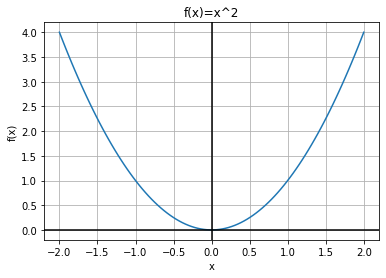

In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
  return x**2

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f1(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

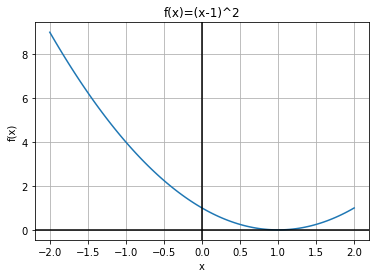

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f2(x):
  return (x - 1)**2

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

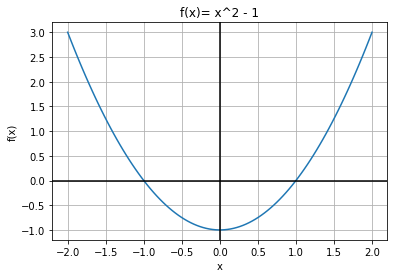

In [25]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f3(x):
  return x**2 - 1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f3(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x^2 - 1')
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

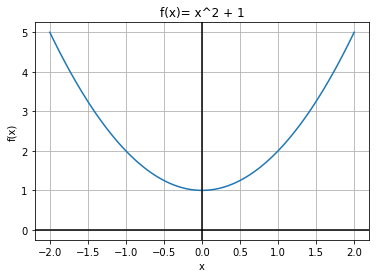

In [26]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f4(x):
  return x**2 + 1

x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f4(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)= x^2 + 1')
plt.xlabel('x')
plt.ylabel('f(x)')

***

#Punto 2



Apply the Classic and Po Shen Loh ‘s methods for solving the following quadratic equations
* x^2 = 0
* (x-1)^2 = 0
* x^2 – 1 =0
* x^2+ 1 =0

***






* $x^{2} = 0$

In [27]:
print(Cuadratica_clasica(1,0,0))

(0, 0)


In [28]:
print(Cuadratica_Po_rapida(1,0,0))

(0, 0)


* $(x-1)^{2} = 0$   ---->        $x^2 -2x +1 = 0$

In [29]:
print(Cuadratica_clasica(1,-2,1))

(1, 1)


In [30]:
print(Cuadratica_Po_rapida(1,-2,1))

(1.00000000000000, 1.00000000000000)


* $x^2 -1 = 0$

In [31]:
print(Cuadratica_clasica(1,0,-1))

(-1, 1)


In [32]:
print(Cuadratica_Po_rapida(1,0,-1))

(-1.00000000000000, 1.00000000000000)


* $x^2 + 1 = 0$

In [33]:
print(Cuadratica_clasica(1,0,1))

(-I, I)


In [34]:
print(Cuadratica_Po_rapida(1,0,1))

(-1.0*I, 1.0*I)


***

#Punto 3


to plot the newton fractals for the corresponding complex quadratic polynomials
* z^2
* (z-1)^2
* z^2 – 1
* z^2+ 1

***

#$$z^2$$

In [35]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2

def df(z):
    return 2*z


def newton_set_z_squared(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 0
    #r2 = 0

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                #elif abs(z-r2)<=eps:
                    # color green
                    #pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display_z_squared(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set_z_squared(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


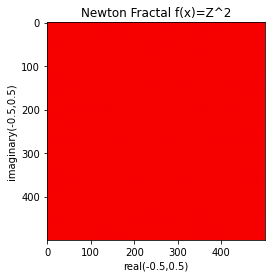

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


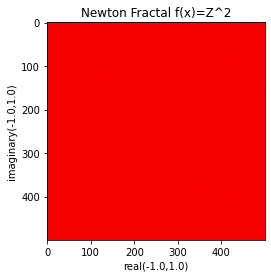

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


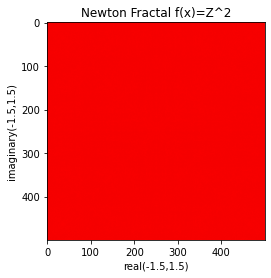

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


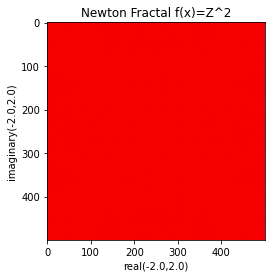

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


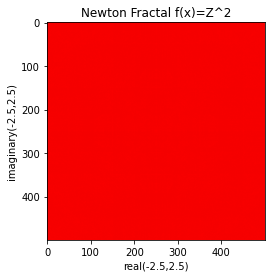

In [36]:
print("zoom out")
display_z_squared(zoom=1)
display_z_squared(zoom=2)
display_z_squared(zoom=3)
display_z_squared(zoom=4)
display_z_squared(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


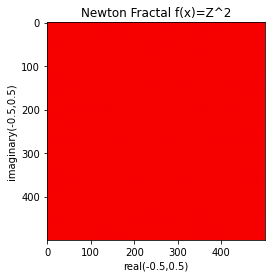

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


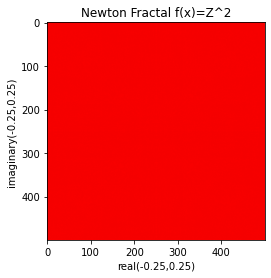

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


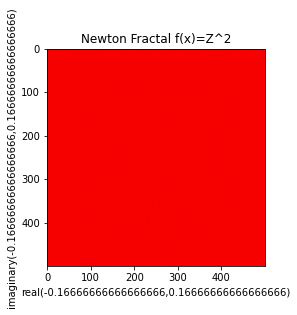

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


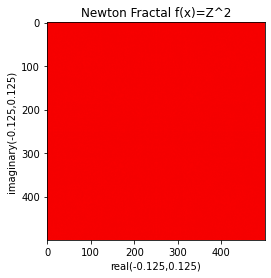

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


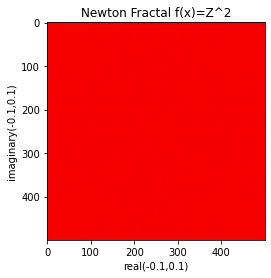

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


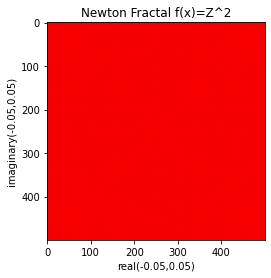

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


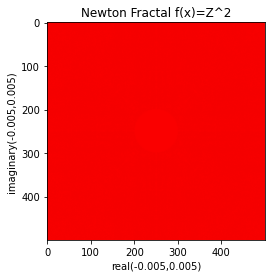

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


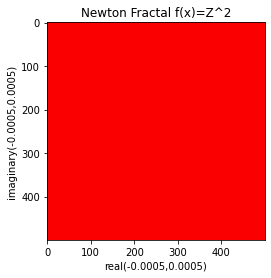

In [37]:
print("zoom in")
display_z_squared(zoom=1)
display_z_squared(zoom=1/2)
display_z_squared(zoom=1/3)
display_z_squared(zoom=1/4)
display_z_squared(zoom=1/5)
display_z_squared(zoom=1/10)
display_z_squared(zoom=1/100)
display_z_squared(zoom=1/1000)

#$$(z-1)^2$$

In [38]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return (z-1) ** 2

def df(z):
    return 2*(z-1)*1


def newton_set_zminus1_squared(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-5 # max error allowed

    # Bounding roots
    r1 = 1
    #r2 = 1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - 2*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                #elif abs(z-r2)<=eps:
                    # color green
                    #pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0,0, 0)
               
    return pixels

def display_zminus1_squared(z_c_r=1, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set_zminus1_squared(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=(Z^2-1)')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


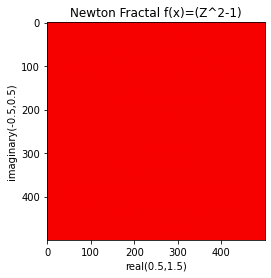

Z region from ( 0.0 , -1.0 ) to ( 2.0 , 1.0 )


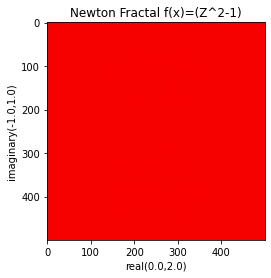

Z region from ( -0.5 , -1.5 ) to ( 2.5 , 1.5 )


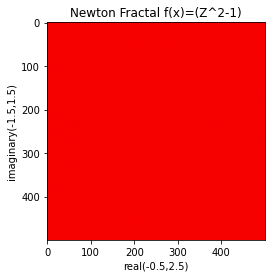

Z region from ( -1.0 , -2.0 ) to ( 3.0 , 2.0 )


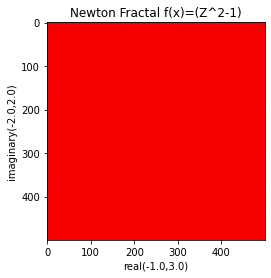

Z region from ( -1.5 , -2.5 ) to ( 3.5 , 2.5 )


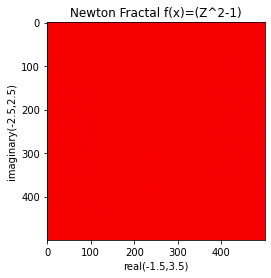

In [39]:
print("zoom out")
display_zminus1_squared(zoom=1)
display_zminus1_squared(zoom=2)
display_zminus1_squared(zoom=3)
display_zminus1_squared(zoom=4)
display_zminus1_squared(zoom=5)

zoom in
Z region from ( 0.5 , -0.5 ) to ( 1.5 , 0.5 )


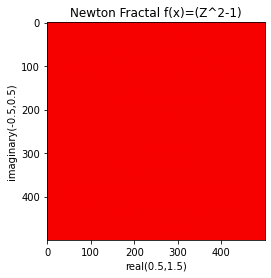

Z region from ( 0.75 , -0.25 ) to ( 1.25 , 0.25 )


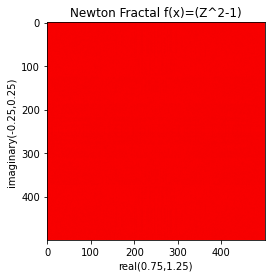

Z region from ( 0.8333333333333334 , -0.16666666666666666 ) to ( 1.1666666666666667 , 0.16666666666666666 )


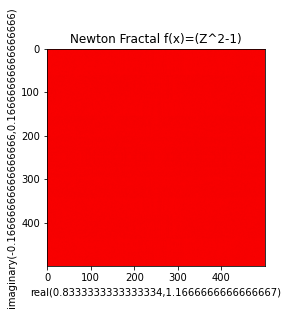

Z region from ( 0.875 , -0.125 ) to ( 1.125 , 0.125 )


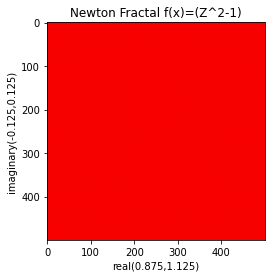

Z region from ( 0.9 , -0.1 ) to ( 1.1 , 0.1 )


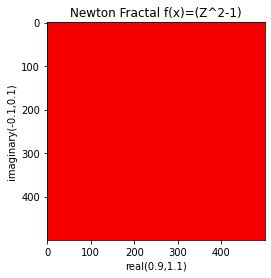

Z region from ( 0.95 , -0.05 ) to ( 1.05 , 0.05 )


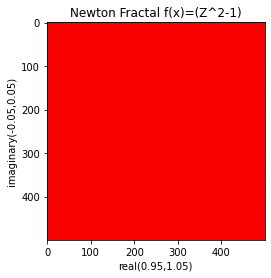

Z region from ( 0.995 , -0.005 ) to ( 1.005 , 0.005 )


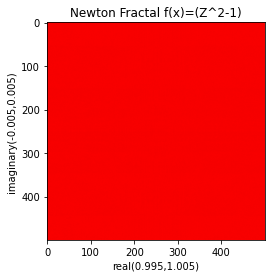

Z region from ( 0.9995 , -0.0005 ) to ( 1.0005 , 0.0005 )


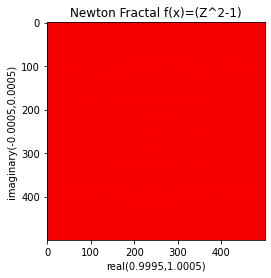

In [40]:
print("zoom in")
display_zminus1_squared(zoom=1)
display_zminus1_squared(zoom=1/2)
display_zminus1_squared(zoom=1/3)
display_zminus1_squared(zoom=1/4)
display_zminus1_squared(zoom=1/5)
display_zminus1_squared(zoom=1/10)
display_zminus1_squared(zoom=1/100)
display_zminus1_squared(zoom=1/1000)

#$$z^2 - 1$$

In [41]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


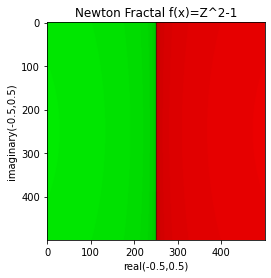

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


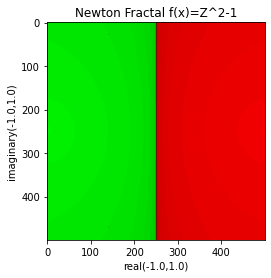

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


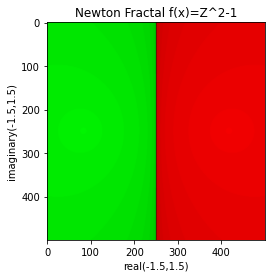

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


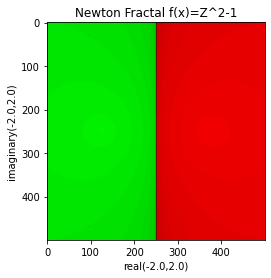

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


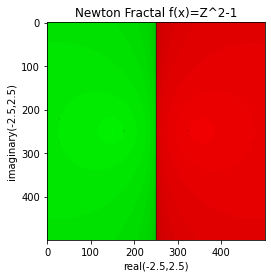

In [42]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


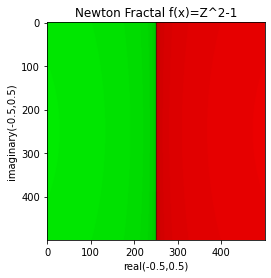

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


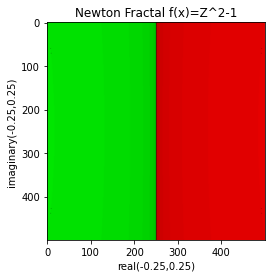

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


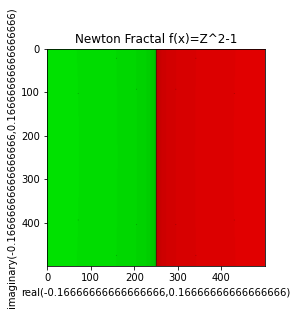

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


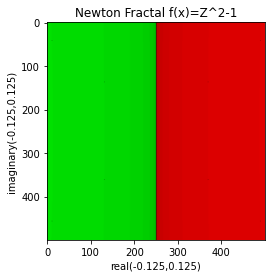

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


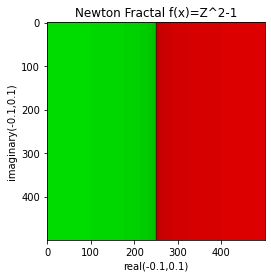

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


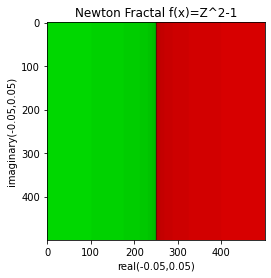

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


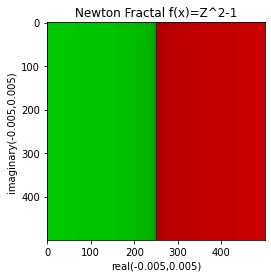

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


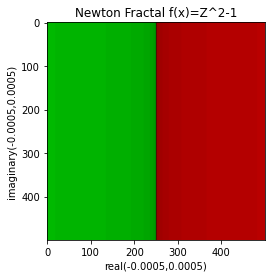

In [43]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

#$$z^2 + 1$$

In [44]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

def newton_set_z_squaredplus1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = complex(0,1)
    r2 = complex(0,-1)

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display_z_squaredplus1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set_z_squaredplus1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal f(x)=Z^2-1')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


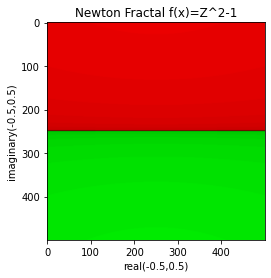

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


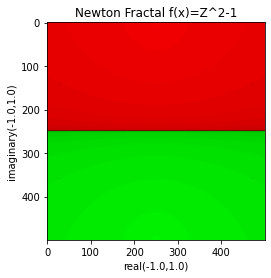

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


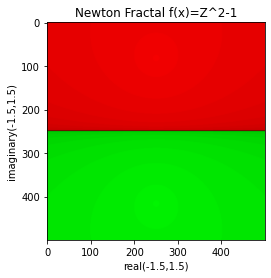

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


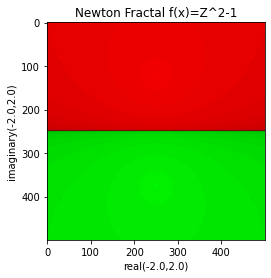

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


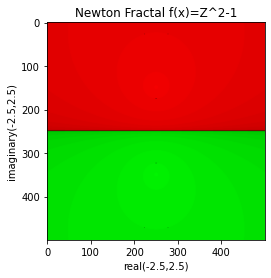

In [45]:
print("zoom out")
display_z_squaredplus1(zoom=1)
display_z_squaredplus1(zoom=2)
display_z_squaredplus1(zoom=3)
display_z_squaredplus1(zoom=4)
display_z_squaredplus1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


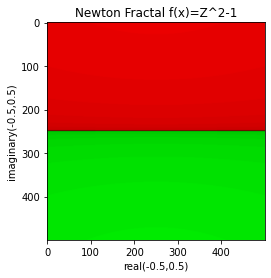

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


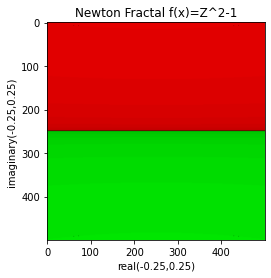

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


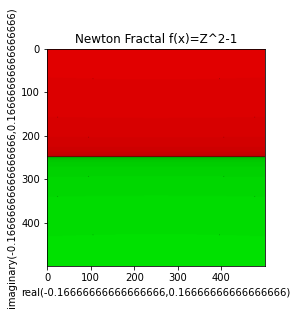

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


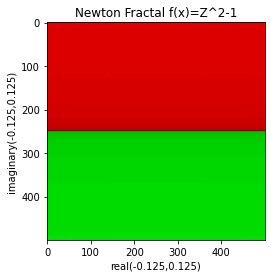

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


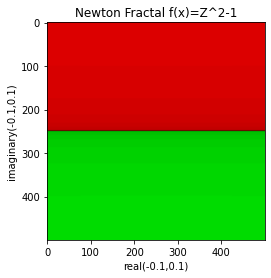

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


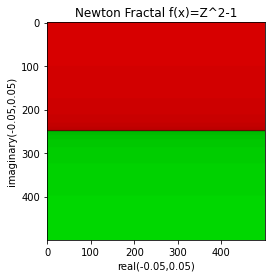

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


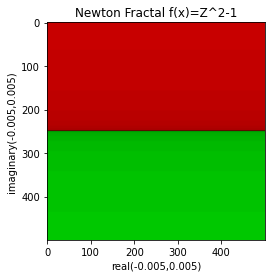

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


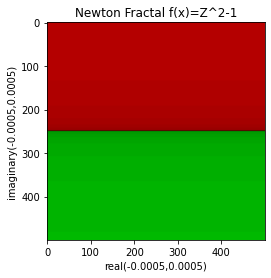

In [46]:
print("zoom in")
display_z_squaredplus1(zoom=1)
display_z_squaredplus1(zoom=1/2)
display_z_squaredplus1(zoom=1/3)
display_z_squaredplus1(zoom=1/4)
display_z_squaredplus1(zoom=1/5)
display_z_squaredplus1(zoom=1/10)
display_z_squaredplus1(zoom=1/100)
display_z_squaredplus1(zoom=1/1000)

***

#Punto 5

Plot he Newton iterates for points on the diagonals in the four quadrants and 0.0 + 0.0j for the complex quadratic polynomials in 3. Give an interpretation of the results.

***

#$$z^2$$

In [47]:
def f(z):
    return z ** 2

def df(z):
    return 2*z

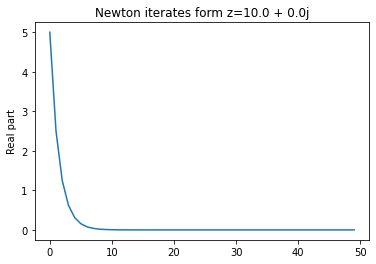

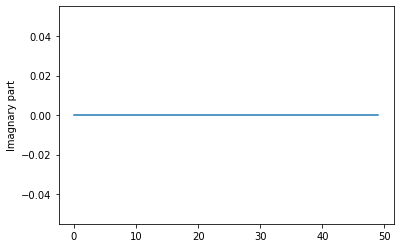

In [48]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

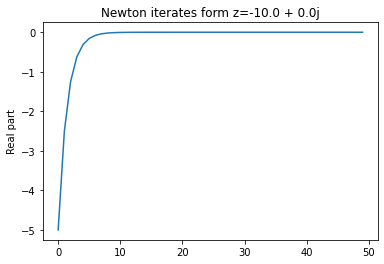

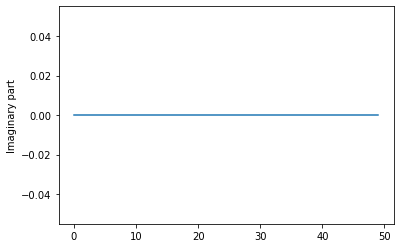

In [49]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

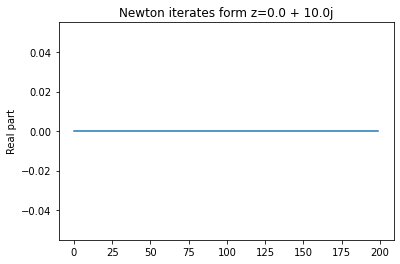

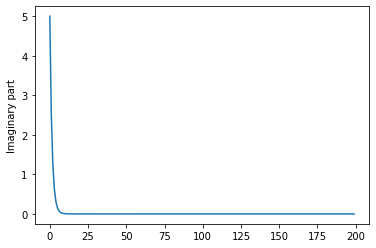

In [50]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

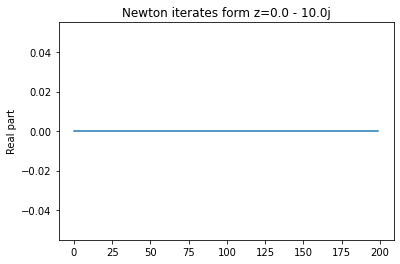

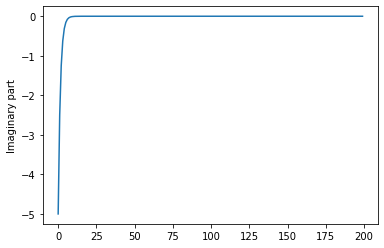

In [51]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [52]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

#$$(z-1)^2$$

In [53]:

def f(z):
    return (z-1) ** 2

def df(z):
    return 2*(z-1)*1

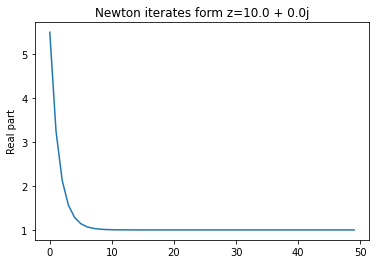

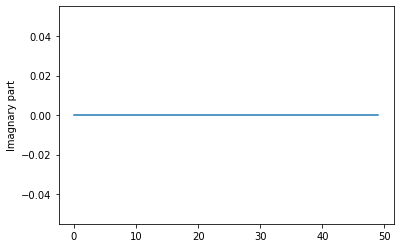

In [54]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

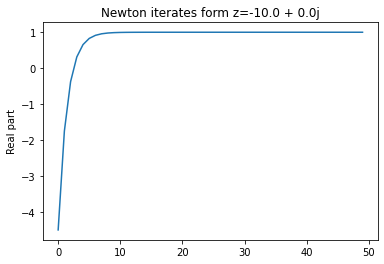

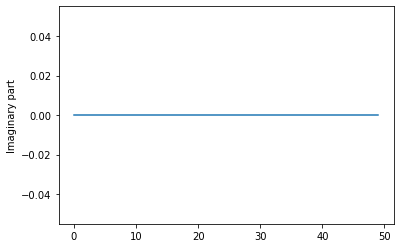

In [55]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

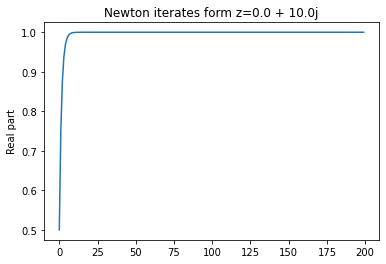

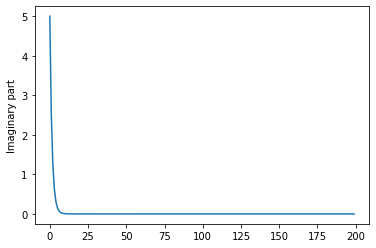

In [56]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

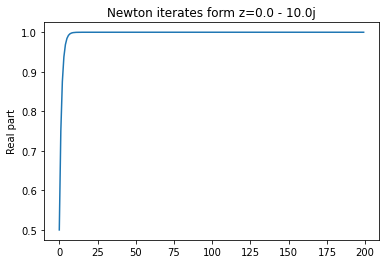

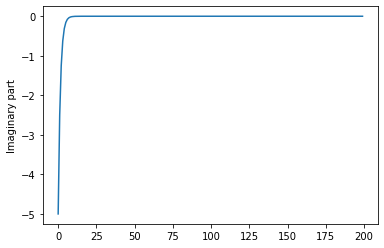

In [57]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [58]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

#$$z^2 - 1$$

In [59]:
def f(z):
    return z ** 2 -1

def df(z):
    return 2 * z

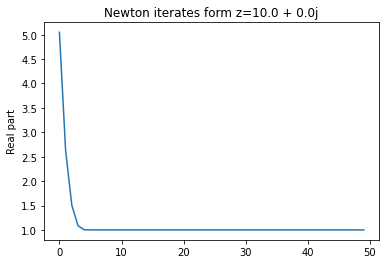

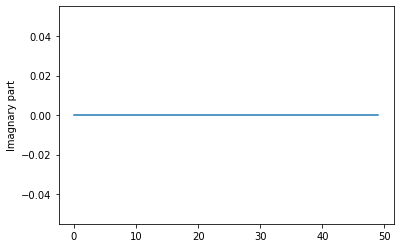

In [60]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

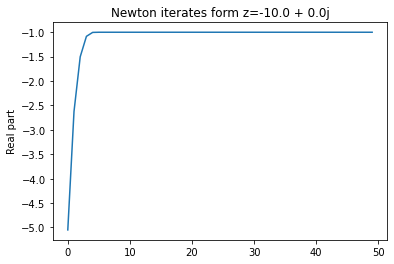

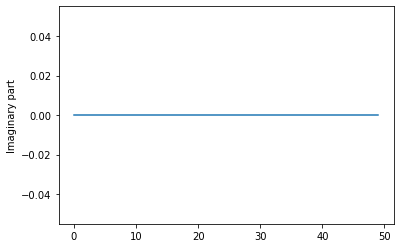

In [61]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

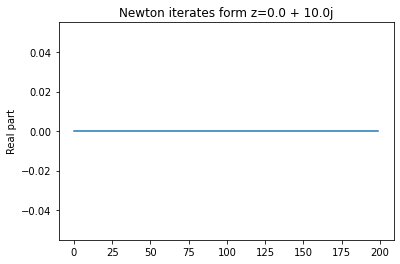

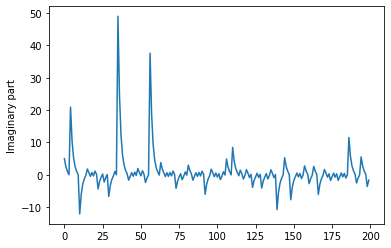

In [62]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

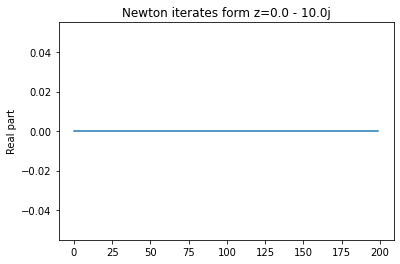

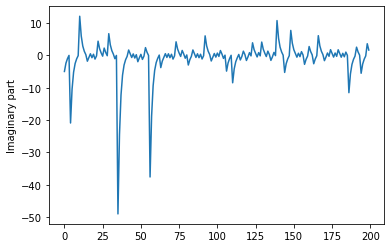

In [63]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [64]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

#$$z^2 + 1$$

In [65]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

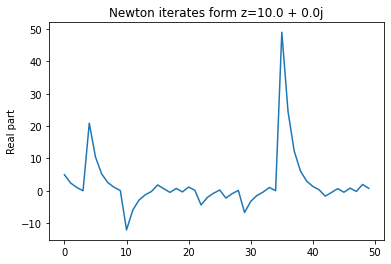

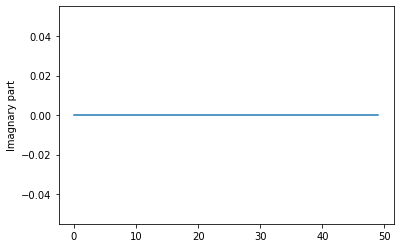

In [66]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

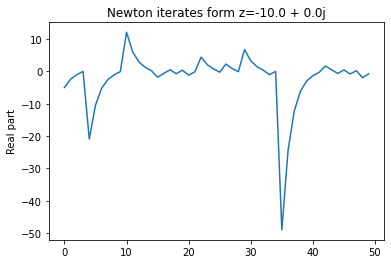

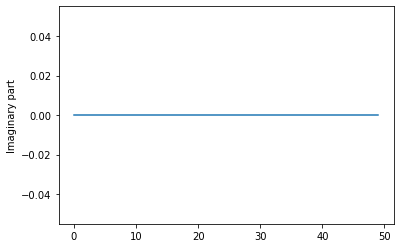

In [67]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

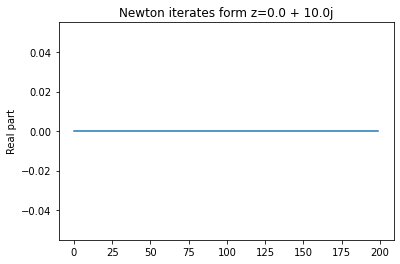

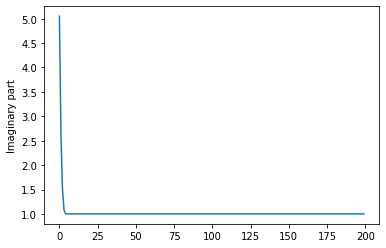

In [68]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

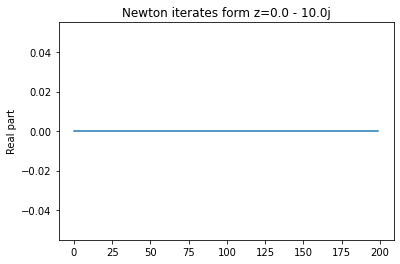

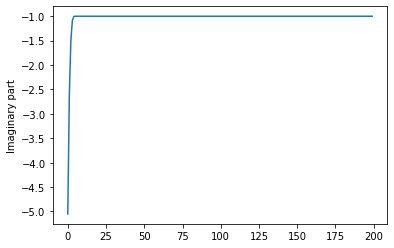

In [69]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

In [70]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored